# Meet MNIST

In [2]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)
nb_classes = 10

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

DeeplearningZeroToAll lab에서는 처음으로 epoch 나온듯

In [4]:
# parameters
training_epochs = 15
batch_size = 100

sess = tf.Session()

# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())
# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = mnist.train.num_examples // batch_size

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 2.826302672
Epoch: 0002 cost = 1.061668952
Epoch: 0003 cost = 0.838061315
Epoch: 0004 cost = 0.733232745
Epoch: 0005 cost = 0.669279885
Epoch: 0006 cost = 0.624611836
Epoch: 0007 cost = 0.591160344
Epoch: 0008 cost = 0.563868987
Epoch: 0009 cost = 0.541745171
Epoch: 0010 cost = 0.522673578
Epoch: 0011 cost = 0.506782325
Epoch: 0012 cost = 0.492447643
Epoch: 0013 cost = 0.479955837
Epoch: 0014 cost = 0.468893674
Epoch: 0015 cost = 0.458703488


sess.run 말고 한가지만을 실행시키고자 할 때는 eval을 사용할 수도 있다는 점 확인

Accuracy:  0.8951
Label:  [0]
Prediction:  [0]


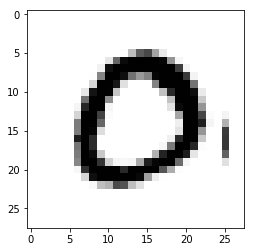

In [5]:
# Test the model using test sets
print("Accuracy: ", accuracy.eval(session=sess, 
                                  feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

sess.close()

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()